In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

dir = '/Users/isabellam/NTNU/H2023/Prosjektoppgave/fomo/policies/hlv_master/results'

In [4]:
def read_csv(policy_name, dir, is_SB):
    dataframes = []
    filenames = []

    for root, dirs, files in os.walk(dir):
        # Filter directories within the root directory
        dirs[:] = [d for d in dirs if d.startswith(policy_name)]
        # Only proceed if we're in a directory that matches the folder prefix
        if os.path.basename(root).startswith(policy_name):
            # Loop through each file in the directory
            for file in files:
                # Check if file starts with the prefix
                if file.startswith(policy_name):
                    file_path = os.path.join(root, file)
                    try:
                        # Load the file into a DataFrame
                        df = pd.read_csv(file_path)
                        # Store the DataFrame in the dictionary using the path as a key
                        dataframes.append(df)
                        filenames.append(os.path.basename(root))
                    except Exception as e:
                        print(f"Failed to read {file_path}: {e}")
    columns_sb = ['Bike Arrivals', 'Bike Starvations', 'Long Congestions']
    
    columns_ff = ['Escooter Arrivals', 'Escooter Starvations', 'Battery Starvations', 'Battery Violations']
    
    fix_dfs = []
    for df in dataframes:
        selected_columns = columns_sb if is_SB else columns_ff
        fix_dfs.append(df[selected_columns])
    return fix_dfs, filenames

In [5]:
def make_pie(column_means):
    # Calculate the percentage contribution of each column's mean
    total_means = column_means.sum()
    percentage_means = (column_means / total_means) * 100

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))  # Adjust the figure size as necessary
    plt.pie(percentage_means, labels=percentage_means.index, autopct='%1.1f%%', startangle=90)
    
    plt.show()

### Make charts

In [6]:
dataframes, filenames = read_csv('SB_base', dir, True)

In [7]:
col_means = []
for df in dataframes:
    col_means.append(df.mean())

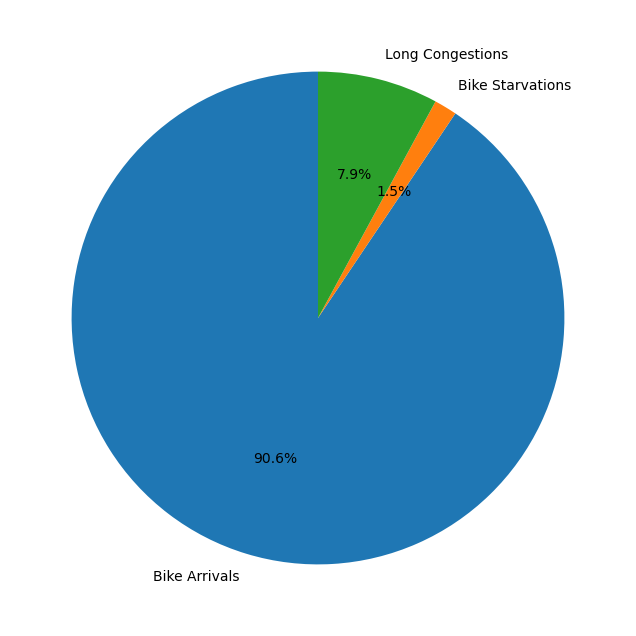

'SB_base_res9_rad22'

In [10]:
make_pie(col_means[0])
filenames[0]